<a href="https://colab.research.google.com/github/peterbabulik/Quantum-Holographic-Codec/blob/main/Dual_Channel_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Alice's Holographic Engine Ready.

1️⃣  Alice's Input Data:
    Signal A (Real): [0.  0.2 0.6 1.  1.  0.6 0.2 0. ]
    Signal B (Imag): [ 0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5]
    Normalization Factor: 2.1909

2️⃣  Running Holographic Encryption...

📡 TRANSMISSION SENT: 'holographic_transmission.pkl'
   - Payload: 3 Qubits
   - Content: 16 Data Points (8 Real + 8 Imaginary)
   (Upload this file to Bob's notebook)


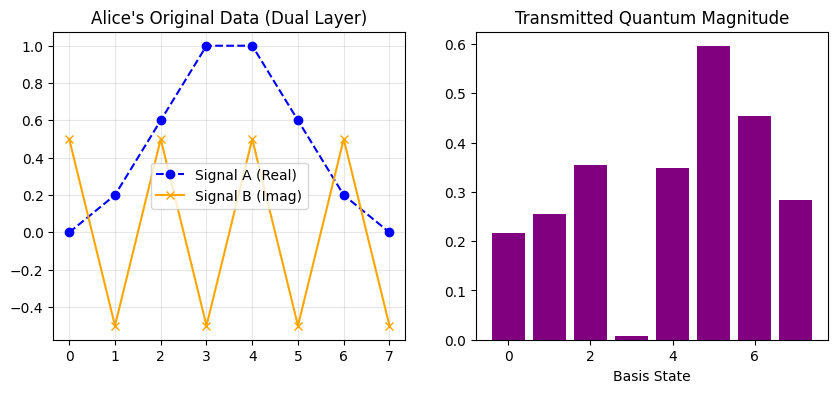

In [ ]:
# @title 🌌 HOLOGRAPHIC COMM PART 1: ALICE (Double Capacity Encoder)
# @markdown ### 🟢 Step 1: Dual-Channel Compression
# @markdown Alice encodes **two distinct datasets** into the Real and Imaginary
# @markdown planes of the quantum state, effectively doubling the storage capacity.

import subprocess
import sys
import numpy as np
import pickle
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Install PennyLane if missing
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
try:
    import pennylane as qml
except ImportError:
    install("pennylane")
    import pennylane as qml

print("✅ Alice's Holographic Engine Ready.")

# ==========================================
# 1. THE SECRET DATA (Dual Signal)
# ==========================================
# We have 3 Qubits = 2^3 = 8 Amplitudes.
# But amplitudes are Complex numbers (a + bi).
# We can store 8 Real values AND 8 Imaginary values.

# Signal A (Real Plane): Smooth Curve
signal_A = np.array([0.0, 0.2, 0.6, 1.0, 1.0, 0.6, 0.2, 0.0])

# Signal B (Imaginary Plane): High Frequency Zig-Zag
signal_B = np.array([0.5, -0.5, 0.5, -0.5, 0.5, -0.5, 0.5, -0.5])

print(f"\n1️⃣  Alice's Input Data:")
print(f"    Signal A (Real): {signal_A}")
print(f"    Signal B (Imag): {signal_B}")

# Combine into Complex Hologram
raw_complex_data = signal_A + 1j * signal_B

# CALCULATE NORM FACTOR
# Quantum states must have length 1. We must scale our data down.
# We need to send this factor to Bob so he can scale the data back up.
norm_factor = np.linalg.norm(raw_complex_data)
normalized_data = raw_complex_data / norm_factor

print(f"    Normalization Factor: {norm_factor:.4f}")

# ==========================================
# 2. THE HOLOGRAPHIC KEY (Circuit Params)
# ==========================================
# The geometry of the MERA circuit acts as the encryption key.
SHARED_KEY = np.array([0.5, 0.9, 1.2, 0.3, 0.7])
n_qubits = 3

def holographic_mera(params, wires):
    """The Encoder Circuit (Compressor)"""
    # Entanglement Layer (Spreading info)
    qml.IsingXX(params[0], wires=[wires[0], wires[1]])
    qml.IsingXX(params[1], wires=[wires[1], wires[2]])

    # Rotation Layer (Encoding Key)
    qml.RY(params[2], wires=wires[0])
    qml.RY(params[3], wires=wires[1])
    qml.RY(params[4], wires=wires[2])

    # Mixing Layer (Interference)
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.CNOT(wires=[wires[1], wires[2]])

# ==========================================
# 3. RUNNING THE CIRCUIT
# ==========================================
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface='numpy')
def alice_circuit(data, params):
    # 1. Load Complex Data into Amplitudes
    qml.AmplitudeEmbedding(features=data, wires=range(n_qubits), normalize=False)

    # 2. Apply Holographic Encryption
    holographic_mera(params, wires=range(n_qubits))

    # Return the complex state vector
    return qml.state()

print("\n2️⃣  Running Holographic Encryption...")
compressed_state = alice_circuit(normalized_data, SHARED_KEY)

# ==========================================
# 4. TRANSMISSION
# ==========================================
transmission_data = {
    "state": np.array(compressed_state),     # The Quantum State
    "scale": norm_factor,                    # The Scaling Factor (Metadata)
    "description": "3-Qubit Dual-Layer Hologram"
}

with open("holographic_transmission.pkl", "wb") as f:
    pickle.dump(transmission_data, f)

print(f"\n📡 TRANSMISSION SENT: 'holographic_transmission.pkl'")
print(f"   - Payload: 3 Qubits")
print(f"   - Content: 16 Data Points (8 Real + 8 Imaginary)")
print("   (Upload this file to Bob's notebook)")

# ==========================================
# 5. VISUALIZATION (What Alice Encoded)
# ==========================================
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(signal_A, 'o--', color='blue', label='Signal A (Real)')
plt.plot(signal_B, 'x-', color='orange', label='Signal B (Imag)')
plt.title("Alice's Original Data (Dual Layer)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(range(8), np.abs(compressed_state), color='purple')
plt.title("Transmitted Quantum Magnitude")
plt.xlabel("Basis State")
plt.show()